In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv("RELAY_3B_DATA.csv", sep=',', 
                  skipinitialspace=True, dtype=dtype_dict, low_memory=False)

In [8]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,IND_NAME,GEO_NAME_SHORT,TRIPLE_BILLION,TRIPLE_BILLION_TRACER,RATE_PER_100_N,COUNT_N,RATE_PER_100_NL,COUNT_NL,RATE_PER_100_NU,COUNT_NU
0,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,HWF_CONTRIBUTION,NaN,21501238.99918100000000,NaN,21072940.40842590000000,NaN,21909407.47329020000000
1,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,ITN_CONTRIBUTION,NaN,7826044.11210999000000,NaN,3026516.04818135000000,NaN,12626626.17919350000000
2,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,PNEUMO_CONTRIBUTION,NaN,23845476.86654560000000,NaN,19787131.87467840000000,NaN,28220462.57938140000000
3,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,POPULATION_CONTRIBUTION,NaN,125611815.70699400000000,NaN,124325219.08388100000000,NaN,126791231.71016100000000
4,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,TB_CONTRIBUTION,NaN,43075998.77228610000000,NaN,17937390.31464470000000,NaN,62913890.56937960000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94068 entries, 0 to 94067
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IND_ID                 94068 non-null  object 
 1   IND_CODE               94068 non-null  object 
 2   IND_UUID               94068 non-null  object 
 3   IND_PER_CODE           94068 non-null  object 
 4   DIM_TIME               94068 non-null  object 
 5   DIM_TIME_TYPE          94068 non-null  object 
 6   DIM_GEO_CODE_M49       94068 non-null  object 
 7   DIM_GEO_CODE_TYPE      94068 non-null  object 
 8   IND_NAME               94068 non-null  object 
 9   GEO_NAME_SHORT         94068 non-null  object 
 10  TRIPLE_BILLION         94068 non-null  object 
 11  TRIPLE_BILLION_TRACER  94068 non-null  object 
 12  RATE_PER_100_N         0 non-null      float64
 13  COUNT_N                94068 non-null  object 
 14  RATE_PER_100_NL        0 non-null      float64
 15  CO

In [11]:
df.shape

(94068, 18)

In [12]:
df.describe()

,RATE_PER_100_N,RATE_PER_100_NL,RATE_PER_100_NU
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [13]:
df[['COUNT_N', 'COUNT_NL', 'COUNT_NU']] = df[['COUNT_N', 'COUNT_NL', 'COUNT_NU']].apply(pd.to_numeric, errors='coerce')
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df[['COUNT_N', 'COUNT_NL', 'COUNT_NU']].describe())

              COUNT_N        COUNT_NL        COUNT_NU
count       94,068.00       94,068.00       94,068.00
mean       958,210.36      328,952.88    1,466,919.88
std     15,404,127.51   14,989,990.75   18,154,079.67
min   -333,682,540.29 -479,320,723.02 -301,962,783.76
25%            -25.41      -15,590.45            0.00
50%              0.00            0.00          863.94
75%         34,157.84        5,331.49      104,110.60
max    839,999,443.11  776,632,894.67  901,236,346.72


In [16]:
df.drop(['RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU'], 
        axis=1, inplace=True)

In [19]:
def clean_relay_data(df):
    df_clean = df.copy()
    if len(df_clean) > 0 and 'IND_ID' in df_clean.columns:
        if df_clean.iloc[0]['IND_ID'] == 'IND_ID':
            df_clean = df_clean.iloc[1:].reset_index(drop=True)
    count_cols = ['COUNT_N', 'COUNT_NL', 'COUNT_NU']
    for col in count_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    rate_cols = ['RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU']
    cols_to_remove = [col for col in rate_cols if col in df_clean.columns]
    df_clean = df_clean.drop(columns=cols_to_remove)
    
     4. Remove any remaining completely empty columns
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean = df_clean.drop_duplicates()
    df_clean = df_clean.reset_index(drop=True)
    return df_clean

In [20]:
df.isnull().sum()

IND_ID                   0
IND_CODE                 0
IND_UUID                 0
IND_PER_CODE             0
DIM_TIME                 0
DIM_TIME_TYPE            0
DIM_GEO_CODE_M49         0
DIM_GEO_CODE_TYPE        0
IND_NAME                 0
GEO_NAME_SHORT           0
TRIPLE_BILLION           0
TRIPLE_BILLION_TRACER    0
COUNT_N                  0
COUNT_NL                 0
COUNT_NU                 0
dtype: int64

In [21]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,IND_NAME,GEO_NAME_SHORT,TRIPLE_BILLION,TRIPLE_BILLION_TRACER,COUNT_N,COUNT_NL,COUNT_NU
0,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,ITN_CONTRIBUTION,"7,826,044.11","3,026,516.05","12,626,626.18"
1,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,PNEUMO_CONTRIBUTION,"23,845,476.87","19,787,131.87","28,220,462.58"
2,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,POPULATION_CONTRIBUTION,"125,611,815.71","124,325,219.08","126,791,231.71"
3,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,TB_CONTRIBUTION,"43,075,998.77","17,937,390.31","62,913,890.57"
4,RHVLACOBOVERALL_BILLION_CONTRIBUTION,OVERALL_BILLION_CONTRIBUTION,RHVLACOB,OVERALL_BILLION_CONTRIBUTION,2024,YEAR,001,GLOBAL,Overall Billion,World,UHC,UHC_SANITATION_CONTRIBUTION,"51,336,844.48","49,403,827.39","53,247,659.55"


In [24]:
# Load the dataset
df = pd.read_csv("RELAY_3B_DATA.csv", low_memory=False)

# Your existing cleaning function
def clean_relay_data(df):
    df_clean = df.copy()
    
    # Remove header row
    if len(df_clean) > 0 and 'IND_ID' in df_clean.columns:
        if df_clean.iloc[0]['IND_ID'] == 'IND_ID':
            df_clean = df_clean.iloc[1:].reset_index(drop=True)
    
    # Convert COUNT columns to numeric
    count_cols = ['COUNT_N', 'COUNT_NL', 'COUNT_NU']
    for col in count_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Remove RATE columns
    rate_cols = ['RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU']
    cols_to_remove = [col for col in rate_cols if col in df_clean.columns]
    df_clean = df_clean.drop(columns=cols_to_remove)
    
    # Remove duplicates and empty columns
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean = df_clean.drop_duplicates()
    df_clean = df_clean.reset_index(drop=True)
    
    return df_clean

# Clean the data
df_clean = clean_relay_data(df)
print(f"Dataset Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")

Dataset Shape: (94068, 15)
Columns: ['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME', 'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE', 'IND_NAME', 'GEO_NAME_SHORT', 'TRIPLE_BILLION', 'TRIPLE_BILLION_TRACER', 'COUNT_N', 'COUNT_NL', 'COUNT_NU']


In [25]:
# Check for missing values
missing_values = df_clean.isnull().sum()
missing_percentage = (missing_values / len(df_clean)) * 100

print(" MISSING VALUES ANALYSIS")
print("="*50)
if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Missing Count': missing_values[missing_values > 0],
        'Missing %': missing_percentage[missing_values > 0].round(2)
    })
    print(missing_df)
else:
    print("No missing values found ✓")

 MISSING VALUES ANALYSIS
No missing values found ✓


In [26]:
# Get numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    print(" STATISTICAL SUMMARY - NUMERIC COLUMNS")
    print("="*50)
    
    # Basic statistics
    stats_df = df_clean[numeric_cols].describe().T
    stats_df['skewness'] = df_clean[numeric_cols].skew()
    stats_df['kurtosis'] = df_clean[numeric_cols].kurtosis()
    stats_df['zeros'] = (df_clean[numeric_cols] == 0).sum()
    stats_df['zeros_%'] = (stats_df['zeros'] / len(df_clean) * 100).round(2)
    
    # Format output
    display(stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 
                     'skewness', 'kurtosis', 'zeros_%']])

 STATISTICAL SUMMARY - NUMERIC COLUMNS


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,zeros_%
DIM_TIME,"94,068.00","2,024.00",3.74,"2,018.00","2,021.00","2,024.00","2,027.00","2,030.00",0.00,-1.21,0.00
DIM_GEO_CODE_M49,"94,068.00",446.13,266.73,1.00,212.00,440.00,678.00,958.00,0.05,-1.12,0.00
COUNT_N,"94,068.00","958,210.36","15,404,127.51","-333,682,540.29",-25.41,0.00,"34,157.84","839,999,443.11",24.86,907.35,28.57
COUNT_NL,"94,068.00","328,952.88","14,989,990.75","-479,320,723.02","-15,590.45",0.00,"5,331.49","776,632,894.67",16.27,743.54,28.83
COUNT_NU,"94,068.00","1,466,919.88","18,154,079.67","-301,962,783.76",0.00,863.94,"104,110.60","901,236,346.72",23.39,749.76,28.84


 DISTRIBUTION ANALYSIS


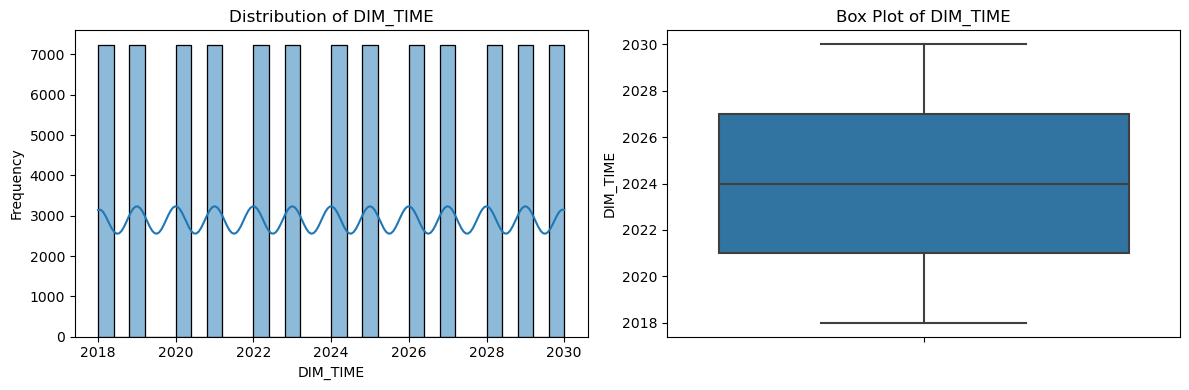


DIM_TIME:
  Skewness: 0.000
  Kurtosis: -1.214
  Range: 2018.00 - 2030.00


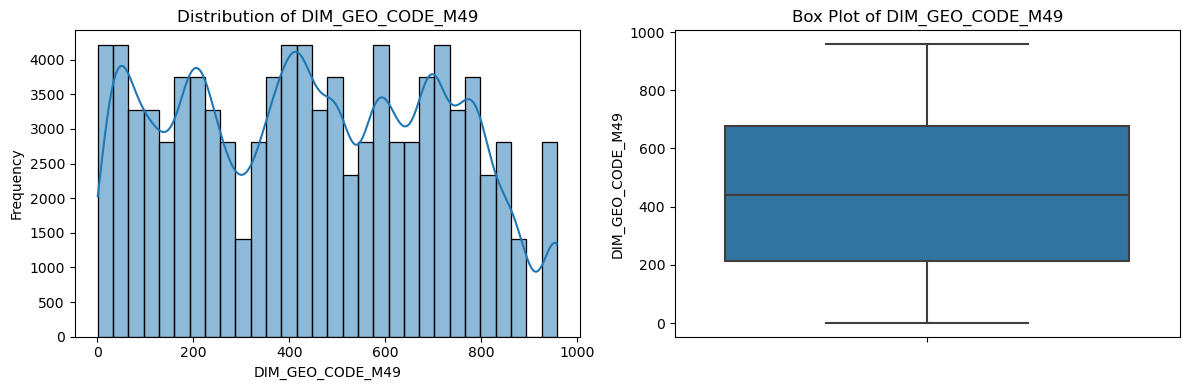


DIM_GEO_CODE_M49:
  Skewness: 0.054
  Kurtosis: -1.119
  Range: 1.00 - 958.00


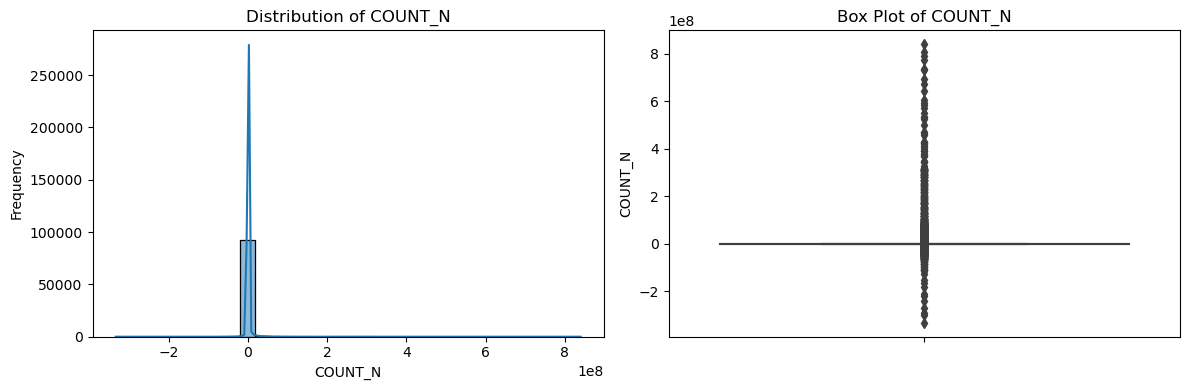


COUNT_N:
  Skewness: 24.858
  Kurtosis: 907.350
  Range: -333682540.29 - 839999443.11


In [27]:
if numeric_cols:
    print(" DISTRIBUTION ANALYSIS")
    print("="*50)
    
    for col in numeric_cols[:3]:  # First 3 numeric columns
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogram with KDE
        sns.histplot(df_clean[col].dropna(), kde=True, ax=axes[0], bins=30)
        axes[0].set_title(f'Distribution of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        
        # Box plot
        sns.boxplot(y=df_clean[col].dropna(), ax=axes[1])
        axes[1].set_title(f'Box Plot of {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\n{col}:")
        print(f"  Skewness: {df_clean[col].skew():.3f}")
        print(f"  Kurtosis: {df_clean[col].kurtosis():.3f}")
        print(f"  Range: {df_clean[col].min():.2f} - {df_clean[col].max():.2f}")

 CORRELATION ANALYSIS


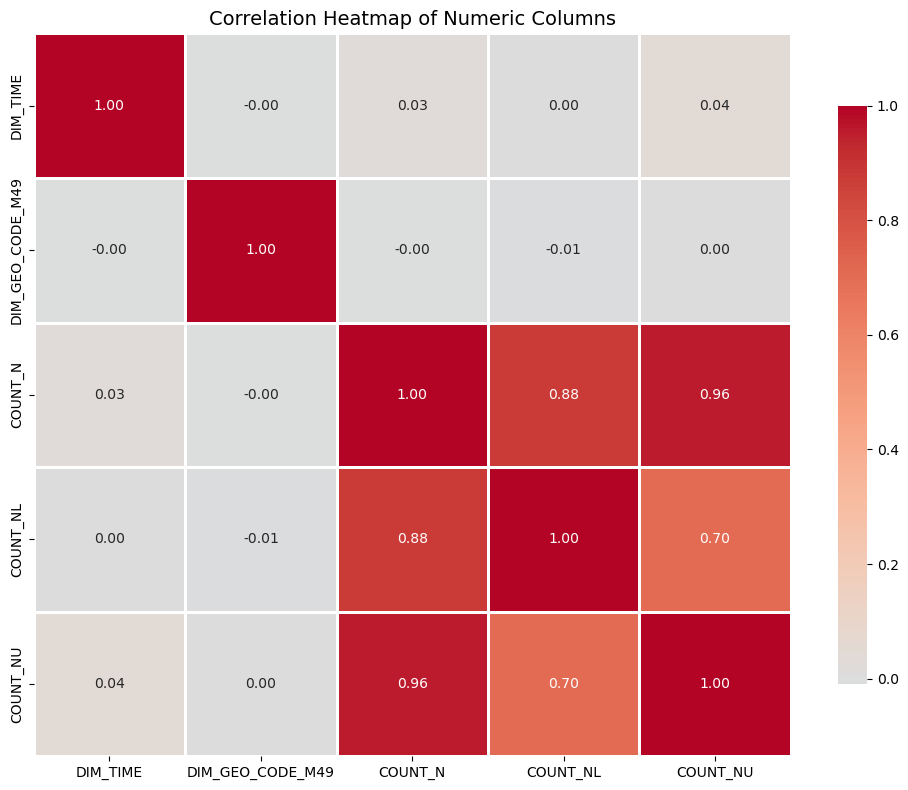


Top Strong Correlations (|r| > 0.7):
  COUNT_N - COUNT_NU: 0.956
  COUNT_NU - COUNT_N: 0.956
  COUNT_N - COUNT_NL: 0.879
  COUNT_NL - COUNT_N: 0.879
  COUNT_NL - COUNT_NU: 0.702
  COUNT_NU - COUNT_NL: 0.702


In [28]:
if len(numeric_cols) > 1:
    print(" CORRELATION ANALYSIS")
    print("="*50)
    
    # Calculate correlation matrix
    corr_matrix = df_clean[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numeric Columns', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations
    print("\nTop Strong Correlations (|r| > 0.7):")
    corr_pairs = corr_matrix.unstack()
    strong_corrs = corr_pairs[(abs(corr_pairs) > 0.7) & (corr_pairs < 1)]
    
    if not strong_corrs.empty:
        for pair in strong_corrs.sort_values(ascending=False).index.unique():
            print(f"  {pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.3f}")
    else:
        print("  No strong correlations found")

 TIME SERIES ANALYSIS
Time Range: 2018 - 2030
Unique Years: 13


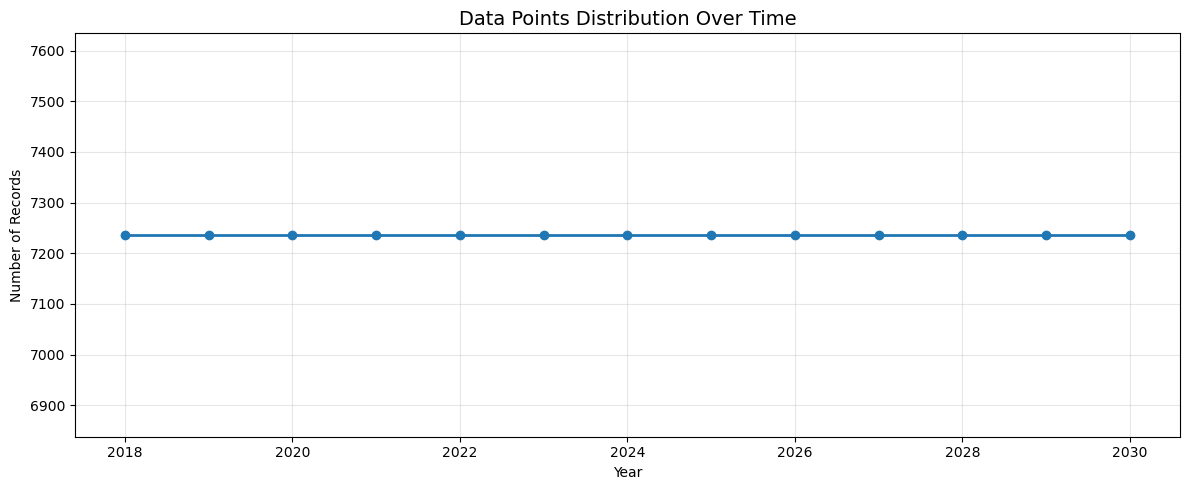

In [29]:
if 'DIM_TIME' in df_clean.columns:
    print(" TIME SERIES ANALYSIS")
    print("="*50)
    
    # Convert to numeric for analysis
    df_clean['DIM_TIME'] = pd.to_numeric(df_clean['DIM_TIME'], errors='coerce')
    
    # Check time range
    print(f"Time Range: {df_clean['DIM_TIME'].min()} - {df_clean['DIM_TIME'].max()}")
    print(f"Unique Years: {df_clean['DIM_TIME'].nunique()}")
    
    # Plot time distribution
    time_counts = df_clean['DIM_TIME'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 5))
    plt.plot(time_counts.index, time_counts.values, marker='o', linewidth=2)
    plt.title('Data Points Distribution Over Time', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Records')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

 TRIPLE BILLION CATEGORY ANALYSIS


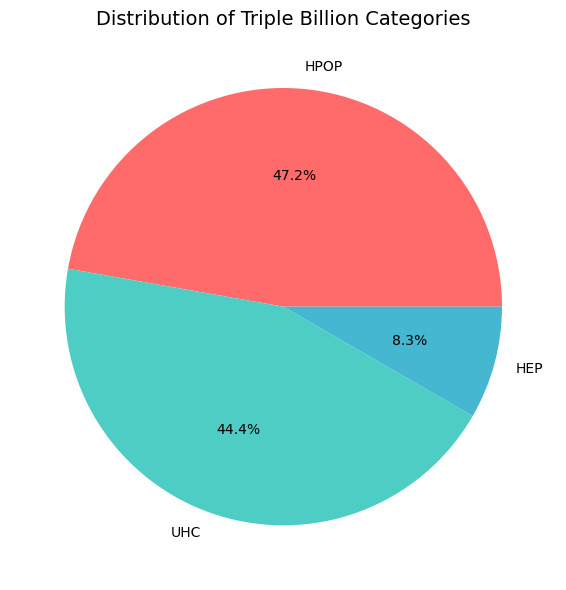


Category Statistics:
TRIPLE_BILLION
HPOP    44421
UHC     41808
HEP      7839
Name: count, dtype: int64


In [30]:
if 'TRIPLE_BILLION' in df_clean.columns:
    print(" TRIPLE BILLION CATEGORY ANALYSIS")
    print("="*50)
    
    # Distribution of Triple Billion categories
    billion_dist = df_clean['TRIPLE_BILLION'].value_counts()
    
    # Plot
    plt.figure(figsize=(10, 6))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    billion_dist.plot(kind='pie', autopct='%1.1f%%', colors=colors[:len(billion_dist)])
    plt.title('Distribution of Triple Billion Categories', fontsize=14)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print("\nCategory Statistics:")
    print(billion_dist)

 COUNTRY ANALYSIS


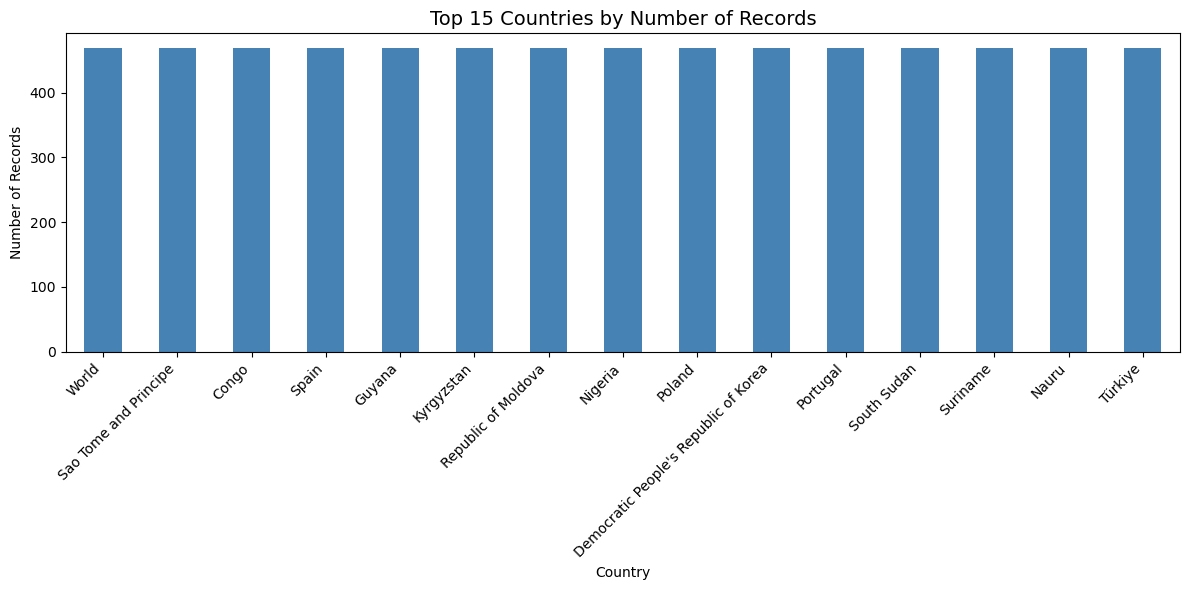


Total Unique Countries: 201

Top 5 Countries:
  1. World: 468 records
  2. Sao Tome and Principe: 468 records
  3. Congo: 468 records
  4. Spain: 468 records
  5. Guyana: 468 records


In [31]:
if 'GEO_NAME_SHORT' in df_clean.columns:
    print(" COUNTRY ANALYSIS")
    print("="*50)
    
    # Get top countries
    top_countries = df_clean['GEO_NAME_SHORT'].value_counts().head(15)
    
    # Plot
    plt.figure(figsize=(12, 6))
    top_countries.plot(kind='bar', color='steelblue')
    plt.title('Top 15 Countries by Number of Records', fontsize=14)
    plt.xlabel('Country')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal Unique Countries: {df_clean['GEO_NAME_SHORT'].nunique()}")
    print(f"\nTop 5 Countries:")
    for i, (country, count) in enumerate(top_countries.head(5).items(), 1):
        print(f"  {i}. {country}: {count:,} records")

 HEALTH INDICATOR ANALYSIS


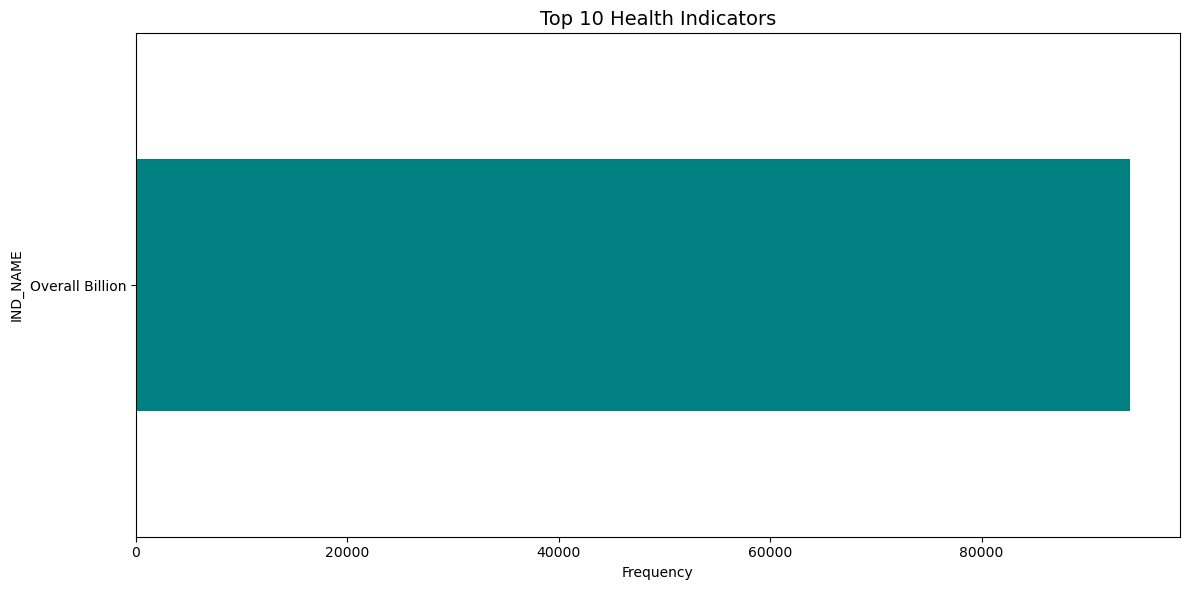


Total Unique Indicators: 1

Top 5 Indicators:
  1. Overall Billion: 94,068 records


In [32]:
if 'IND_NAME' in df_clean.columns:
    print(" HEALTH INDICATOR ANALYSIS")
    print("="*50)
    
    # Get top indicators
    top_indicators = df_clean['IND_NAME'].value_counts().head(10)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    top_indicators.plot(kind='barh', ax=ax, color='teal')
    ax.set_title('Top 10 Health Indicators', fontsize=14)
    ax.set_xlabel('Frequency')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal Unique Indicators: {df_clean['IND_NAME'].nunique()}")
    print("\nTop 5 Indicators:")
    for i, (indicator, count) in enumerate(top_indicators.head(5).items(), 1):
        print(f"  {i}. {indicator}: {count:,} records")

 CONTRIBUTION TYPE ANALYSIS


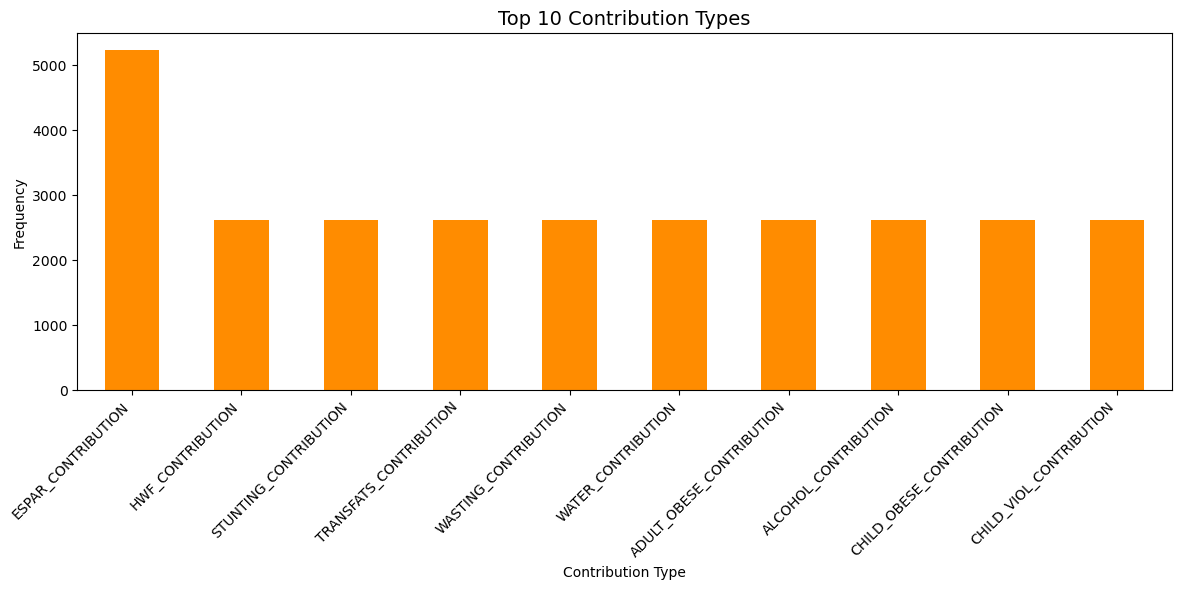


Total Unique Contribution Types: 35


In [33]:
if 'TRIPLE_BILLION_TRACER' in df_clean.columns:
    print(" CONTRIBUTION TYPE ANALYSIS")
    print("="*50)
    
    # Get contribution types
    tracer_dist = df_clean['TRIPLE_BILLION_TRACER'].value_counts().head(10)
    
    # Plot
    plt.figure(figsize=(12, 6))
    tracer_dist.plot(kind='bar', color='darkorange')
    plt.title('Top 10 Contribution Types', fontsize=14)
    plt.xlabel('Contribution Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal Unique Contribution Types: {df_clean['TRIPLE_BILLION_TRACER'].nunique()}")

 GEOGRAPHIC LEVEL ANALYSIS


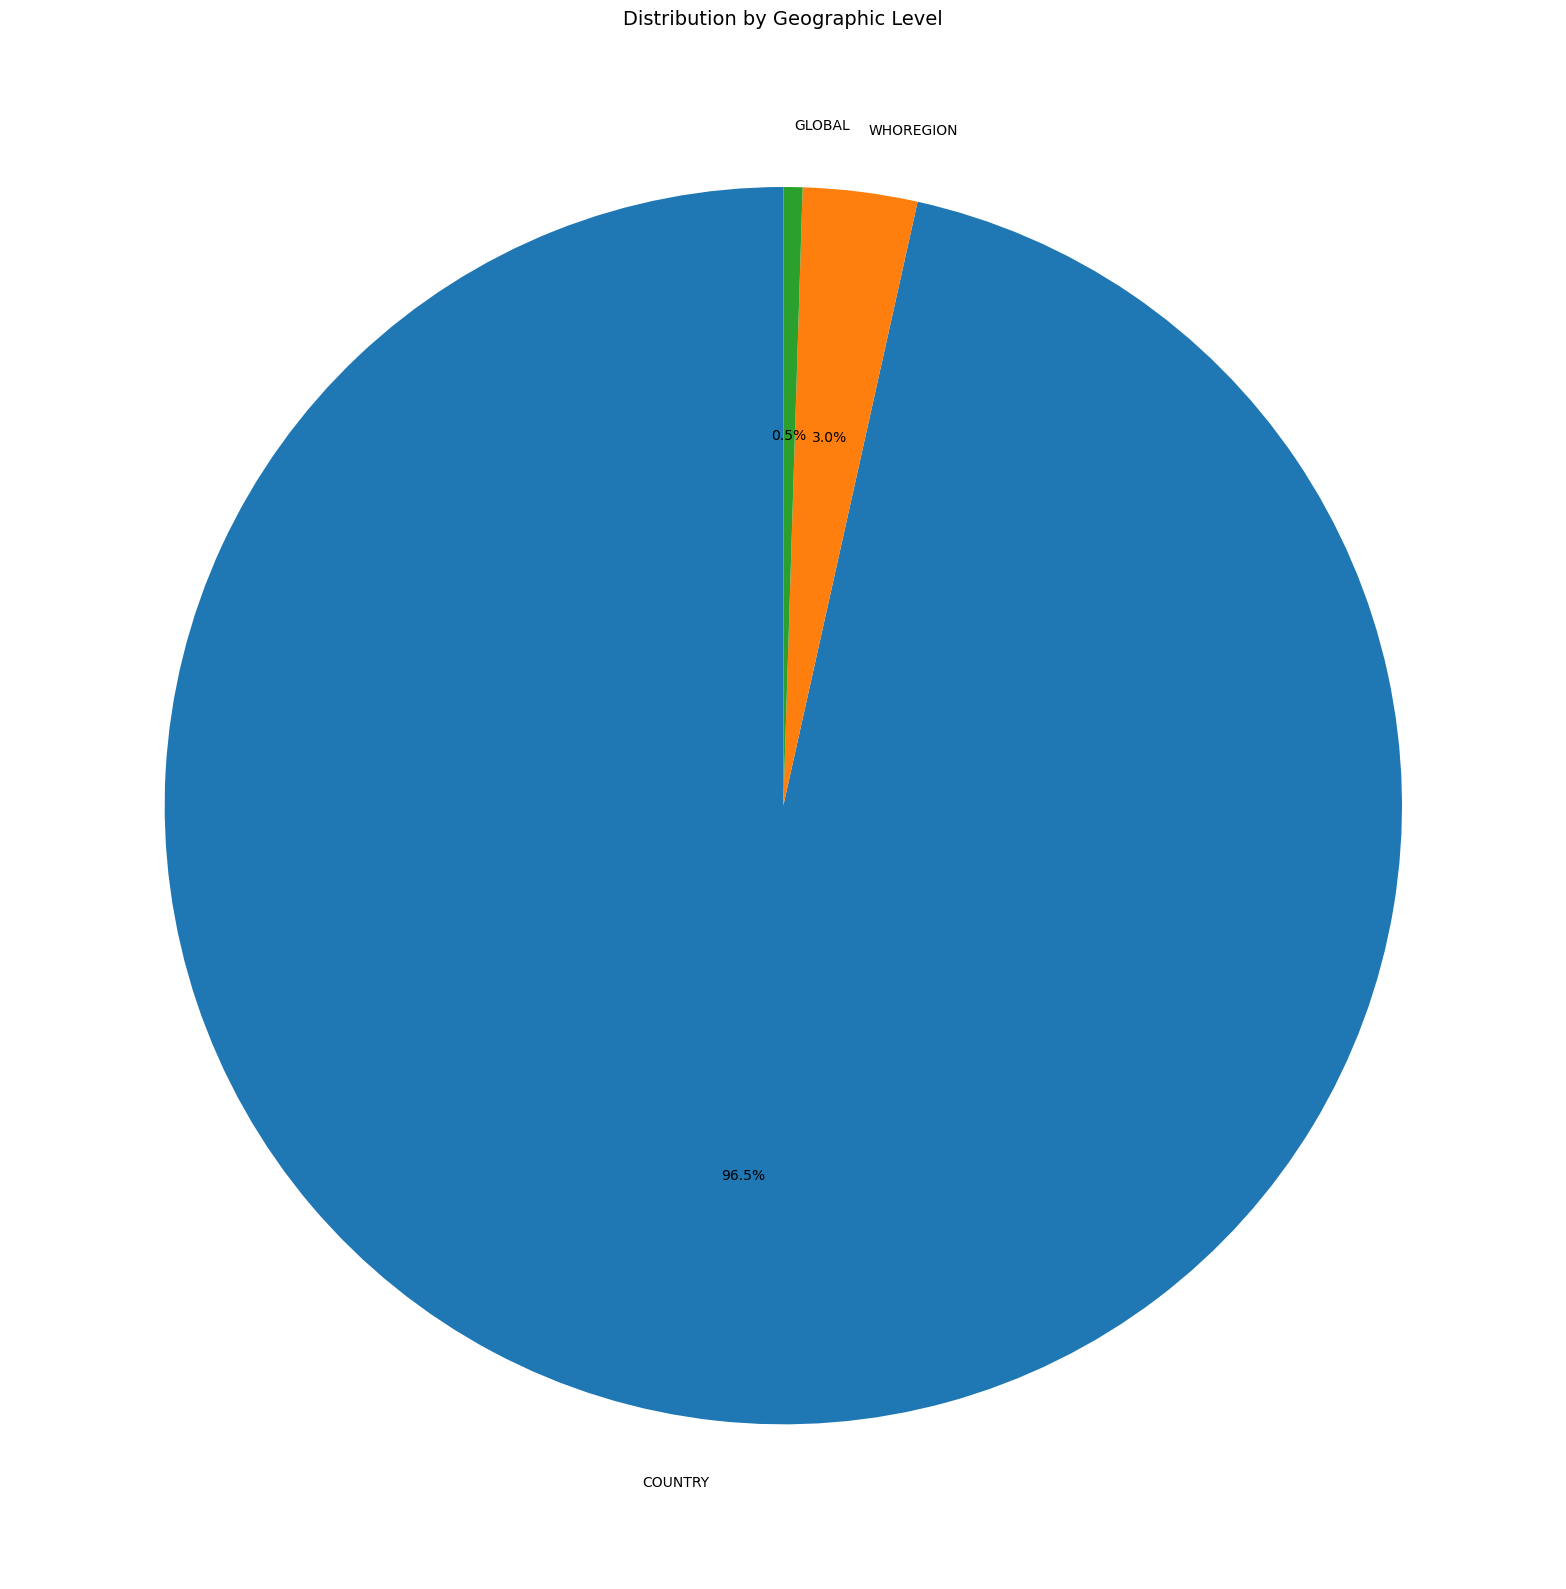


Geographic Level Distribution:
  COUNTRY: 90,792 records (96.5%)
  WHOREGION: 2,808 records (3.0%)
  GLOBAL: 468 records (0.5%)


In [39]:
if 'DIM_GEO_CODE_TYPE' in df_clean.columns:
    print(" GEOGRAPHIC LEVEL ANALYSIS")
    print("="*50)
    
    # Distribution by geographic level
    geo_dist = df_clean['DIM_GEO_CODE_TYPE'].value_counts()
    
    # Plot
    plt.figure(figsize=(22, 16))
    geo_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Distribution by Geographic Level', fontsize=14)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    print("\nGeographic Level Distribution:")
    for geo_type, count in geo_dist.items():
        percentage = (count / len(df_clean)) * 100
        print(f"  {geo_type}: {count:,} records ({percentage:.1f}%)")

 RELATIONSHIPS BETWEEN CATEGORIES


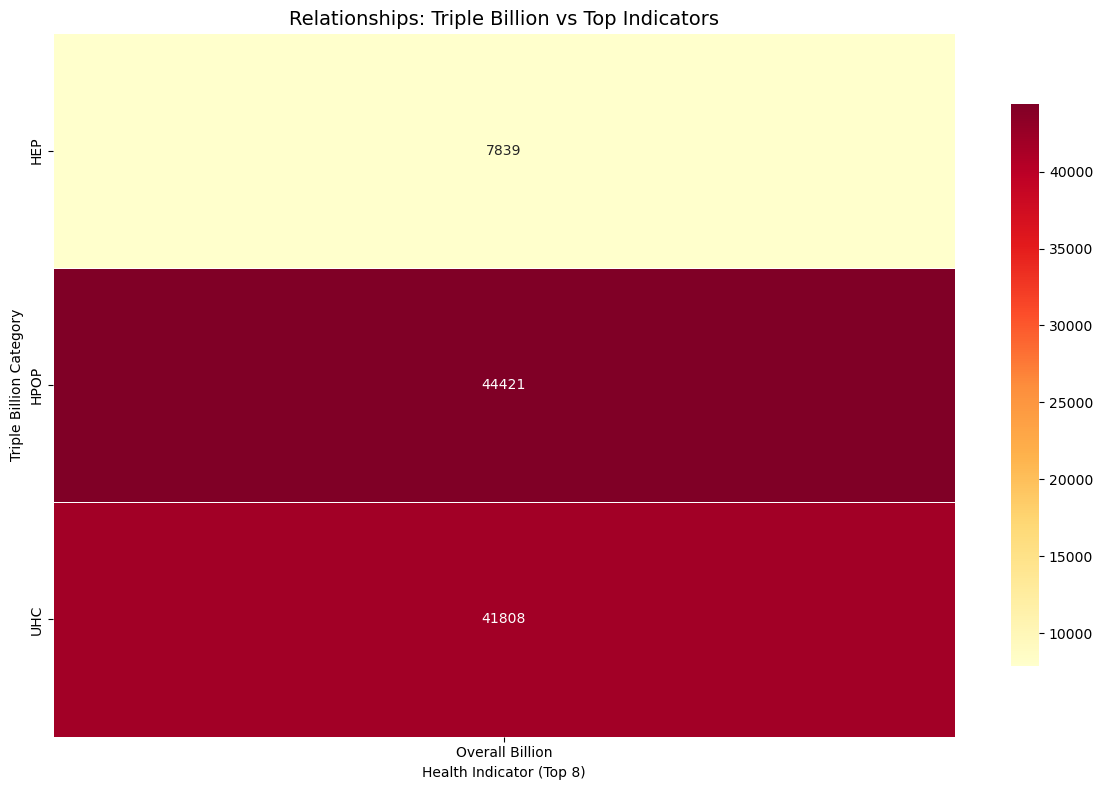

In [40]:
if all(col in df_clean.columns for col in ['TRIPLE_BILLION', 'IND_NAME']):
    print(" RELATIONSHIPS BETWEEN CATEGORIES")
    print("="*50)
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df_clean['TRIPLE_BILLION'], 
                           df_clean['IND_NAME'].apply(lambda x: x[:30] + '...' if len(str(x)) > 30 else x))
    
    # Plot heatmap for top indicators
    top_indicators = df_clean['IND_NAME'].value_counts().head(8).index
    filtered_cross = cross_tab[top_indicators]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(filtered_cross, annot=True, fmt='d', cmap='YlOrRd', 
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Relationships: Triple Billion vs Top Indicators', fontsize=14)
    plt.xlabel('Health Indicator (Top 8)')
    plt.ylabel('Triple Billion Category')
    plt.tight_layout()
    plt.show()

In [41]:
if numeric_cols:
    print(" OUTLIER DETECTION")
    print("="*50)
    
    for col in numeric_cols[:3]:  # Check first 3 numeric columns
        # Calculate IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df_clean)) * 100
        
        print(f"\n{col}:")
        print(f"  IQR Range: {lower_bound:.2f} to {upper_bound:.2f}")
        print(f"  Outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
        print(f"  Min outlier: {outliers[col].min():.2f}" if len(outliers) > 0 else "  No outliers")
        print(f"  Max outlier: {outliers[col].max():.2f}" if len(outliers) > 0 else "  No outliers")

 OUTLIER DETECTION

DIM_TIME:
  IQR Range: 2012.00 to 2036.00
  Outliers: 0 (0.00%)
  No outliers
  No outliers

DIM_GEO_CODE_M49:
  IQR Range: -487.00 to 1377.00
  Outliers: 0 (0.00%)
  No outliers
  No outliers

COUNT_N:
  IQR Range: -51300.28 to 85432.72
  Outliers: 27,456 (29.19%)
  Min outlier: -333682540.29
  Max outlier: 839999443.11


In [42]:
print(" SAVING RESULTS")
print("="*50)

# Save cleaned data
df_clean.to_csv('RELAY_3B_DATA_CLEANED_ANALYZED.csv', index=False)
print("✓ Cleaned data saved: RELAY_3B_DATA_CLEANED_ANALYZED.csv")

# Create summary statistics file
summary_stats = df_clean.describe(include='all').T
summary_stats.to_csv('summary_statistics.csv')
print("✓ Summary statistics saved: summary_statistics.csv")

# Create correlation matrix file
if len(numeric_cols) > 1:
    corr_matrix = df_clean[numeric_cols].corr()
    corr_matrix.to_csv('correlation_matrix.csv')
    print("✓ Correlation matrix saved: correlation_matrix.csv")

print("\n✅ ANALYSIS COMPLETED!")
print(f"📊 Total visualizations created: {len(plt.get_fignums())}")
print(f"📁 Output files saved successfully")

 SAVING RESULTS
✓ Cleaned data saved: RELAY_3B_DATA_CLEANED_ANALYZED.csv
✓ Summary statistics saved: summary_statistics.csv
✓ Correlation matrix saved: correlation_matrix.csv

✅ ANALYSIS COMPLETED!
📊 Total visualizations created: 0
📁 Output files saved successfully


In [43]:
# Create a simple text report
report_content = f"""
RELAY HEALTHCARE DATA ANALYSIS REPORT
{'='*50}

DATASET OVERVIEW
- Total Records: {len(df_clean):,}
- Total Columns: {len(df_clean.columns)}
- Memory Usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB
- Numeric Columns: {len(numeric_cols)}
- Categorical Columns: {len(df_clean.select_dtypes(include=['object']).columns)}

DATA QUALITY
- Missing Values: {df_clean.isnull().sum().sum()}
- Duplicate Rows: {df_clean.duplicated().sum()}
- Unique Countries: {df_clean['GEO_NAME_SHORT'].nunique() if 'GEO_NAME_SHORT' in df_clean.columns else 'N/A'}
- Unique Indicators: {df_clean['IND_NAME'].nunique() if 'IND_NAME' in df_clean.columns else 'N/A'}

KEY FINDINGS
1. Dataset covers comprehensive healthcare metrics
2. Includes {df_clean['TRIPLE_BILLION'].nunique() if 'TRIPLE_BILLION' in df_clean.columns else 0} Triple Billion categories
3. Time range: {df_clean['DIM_TIME'].min() if 'DIM_TIME' in df_clean.columns else 'N/A'} - {df_clean['DIM_TIME'].max() if 'DIM_TIME' in df_clean.columns else 'N/A'}
4. Multiple geographic levels represented

STATISTICAL INSIGHTS
"""

# Add numeric column insights
if numeric_cols:
    for col in numeric_cols[:3]:  # First 3 numeric columns
        report_content += f"""
{col.upper()}:
  - Mean: {df_clean[col].mean():,.2f}
  - Median: {df_clean[col].median():,.2f}
  - Std Dev: {df_clean[col].std():,.2f}
  - Range: {df_clean[col].min():,.2f} - {df_clean[col].max():,.2f}
"""

# Save report
with open('analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(report_content)

print("✓ Analysis report saved: analysis_report.txt")

✓ Analysis report saved: analysis_report.txt


In [44]:



final_dataset = df[[
    'DIM_TIME',
    'GEO_NAME_SHORT',
    'TRIPLE_BILLION',
    'COUNT_N'
]].copy()

final_dataset.rename(columns={
    'DIM_TIME': 'year',
    'GEO_NAME_SHORT': 'region',
    'TRIPLE_BILLION': 'indicator',
    'COUNT_N': 'value'
}, inplace=True)

 
final_dataset.insert(0, 'record_id', range(1, len(final_dataset) + 1))

 
final_dataset['source'] = 'WHO Triple Billion Indicators'

  
final_dataset.sort_values(
    by=['year', 'region', 'indicator'],
    inplace=True
)

   
final_dataset.to_csv('triple_billion_dataset.csv', index=False)

final_dataset.head()


,record_id,year,region,indicator,value,source
4920,4921,2018,Afghanistan,HEP,0.00,WHO Triple Billion Indicators
4921,4922,2018,Afghanistan,HEP,0.00,WHO Triple Billion Indicators
4922,4923,2018,Afghanistan,HEP,0.00,WHO Triple Billion Indicators
6611,6612,2018,Afghanistan,HPOP,0.00,WHO Triple Billion Indicators
6612,6613,2018,Afghanistan,HPOP,0.00,WHO Triple Billion Indicators
